# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy import stats

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(study_results, mouse_metadata, on='Mouse ID')

# Display the data table for preview
merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [21]:
# Checking the number of mice.
mouse_count=merged_data['Mouse ID'].nunique()
mouse_count

249

In [22]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows = merged_data[merged_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mouse_ids = duplicate_rows['Mouse ID'].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [23]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_rows

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [24]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merged_data = merged_data[~merged_data['Mouse ID'].isin(duplicate_mouse_ids)]
merged_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [25]:
# Checking the number of mice in the clean DataFrame.
mouse_count=merged_data['Mouse ID'].nunique()
mouse_count

248

## Summary Statistics

In [26]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats = merged_data.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
# Group by 'Drug Regimen'
grouped = merged_data.groupby('Drug Regimen')
mean_tumor_volume = grouped['Tumor Volume (mm3)'].mean()
median_tumor_volume = grouped['Tumor Volume (mm3)'].median()
variance_tumor_volume = grouped['Tumor Volume (mm3)'].var()
std_tumor_volume = grouped['Tumor Volume (mm3)'].std()
sem_tumor_volume = grouped['Tumor Volume (mm3)'].apply(lambda x: stats.sem(x))

summary_stats = pd.DataFrame({
    'Mean Tumor Volume': mean_tumor_volume,
    'Median Tumor Volume': median_tumor_volume,
    'Tumor Volume Variance': variance_tumor_volume,
    'Tumor Volume Std. Var.': std_tumor_volume,
    'Tumor Volume Std. Error': sem_tumor_volume
})
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Var.,Tumor Volume Std. Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [29]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = merged_data.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
summary_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

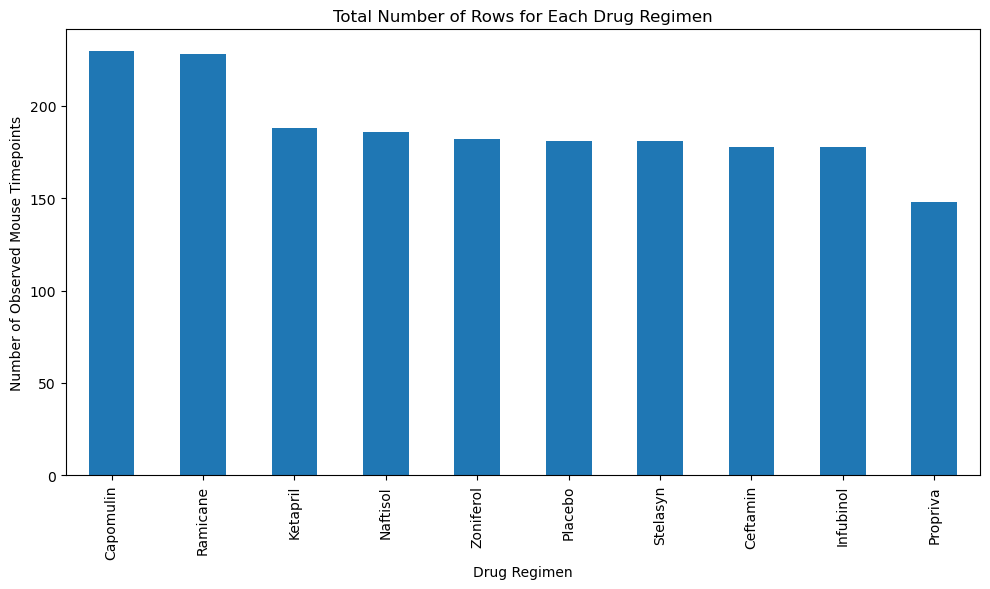

In [39]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas
grouped_counts = merged_data.groupby('Drug Regimen').size()

# Sort the grouped counts in descending order
grouped_counts_sorted = grouped_counts.sort_values(ascending=False)

# Plot the bar chart using Pandas
grouped_counts_sorted.plot(kind='bar', figsize=(10, 6))

# Set the title and labels
plt.title('Total Number of Rows for Each Drug Regimen (Ordered Largest to Smallest)')
plt.xlabel('Drug Regimen')
plt.ylabel('Total Number of Rows')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

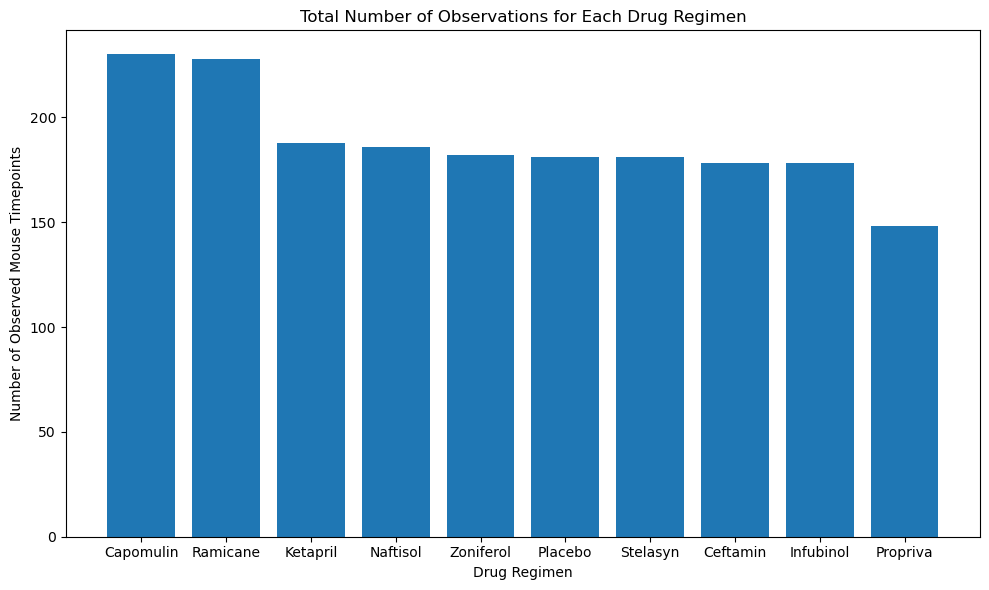

In [40]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Plot the bar chart
drug_regimens = grouped_counts_sorted.index
counts = grouped_counts_sorted.values
plt.figure(figsize=(10, 6))
plt.bar(drug_regimens, counts)
# Set the title and labels
plt.title('Total Number of Observations for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Observed Mouse Timepoints')

# Show the plot
plt.tight_layout()
plt.show()

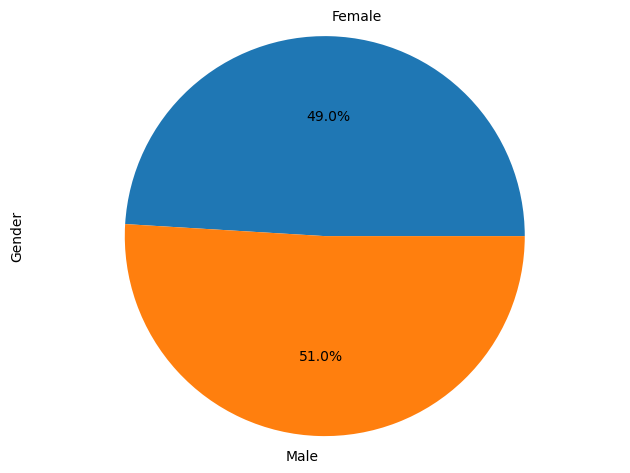

In [47]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
grouped_counts = merged_data.groupby('Sex').size()
grouped_counts.plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.ylabel('Gender')
plt.tight_layout()
plt.show()

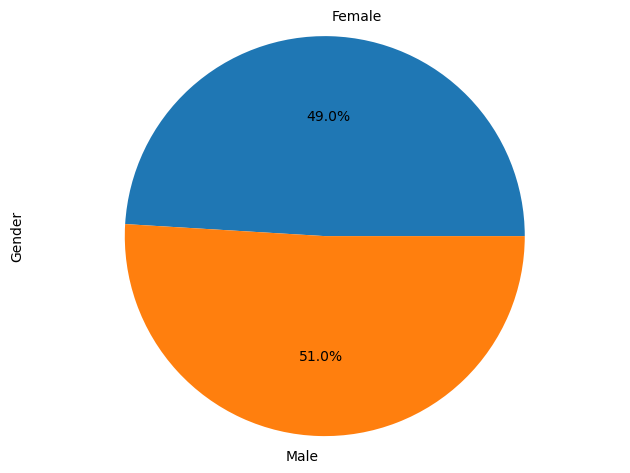

In [50]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure
plt.pie(grouped_counts, labels=grouped_counts.index, autopct='%1.1f%%')
plt.axis('equal')
plt.ylabel('Gender')
plt.tight_layout()
plt.show()

## Quartiles, Outliers and Boxplots

In [53]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
selected_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_data = merged_data[merged_data['Drug Regimen'].isin(selected_regimens)]

# Start by getting the last (greatest) timepoint for each mouse
max_timepoints = filtered_data.groupby('Mouse ID')['Timepoint'].max()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volumes=pd.merge(max_timepoints,merged_data,on=['Mouse ID','Timepoint'], how='left')
final_tumor_volumes


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [58]:
# Put treatments into a list for for loop (and later for plot labels)
selected_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for regimen in selected_regimens:

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume_data = final_tumor_volumes.loc[final_tumor_volumes['Drug Regimen'] == regimen, 'Tumor Volume (mm3)']
    

    # add subset 
    tumor_vol.append(tumor_volume_data) #populate our list

    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volume_data.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    outliers = tumor_volume_data.loc[(tumor_volume_data < lower_bound) | (tumor_volume_data > upper_bound)]
    outliers_str = outliers.to_string(index=False).replace('\n', ', ')
    print(f"{regimen}'s potential outliers: {outliers_str if not outliers.empty else 'No outliers'}")


Capomulin's potential outliers: No outliers
Ramicane's potential outliers: No outliers
Infubinol's potential outliers: 36.321346
Ceftamin's potential outliers: No outliers


<Figure size 640x480 with 0 Axes>

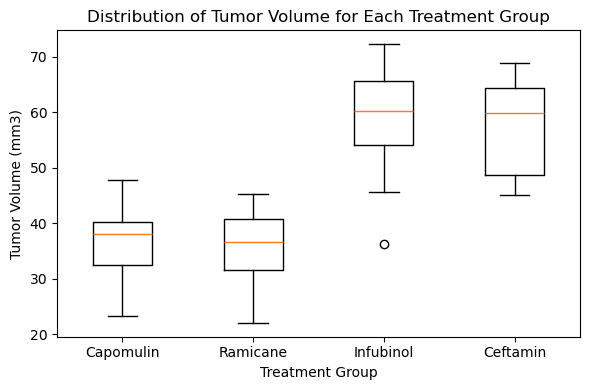

In [68]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure()

# Create a box plot
plt.figure(figsize=(6, 4))
plt.boxplot(tumor_volume, labels=selected_regimens)

# Set the title and labels
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.xlabel('Treatment Group')
plt.ylabel('Tumor Volume (mm3)')

# Show the plot
plt.tight_layout()
plt.show()

## Line and Scatter Plots

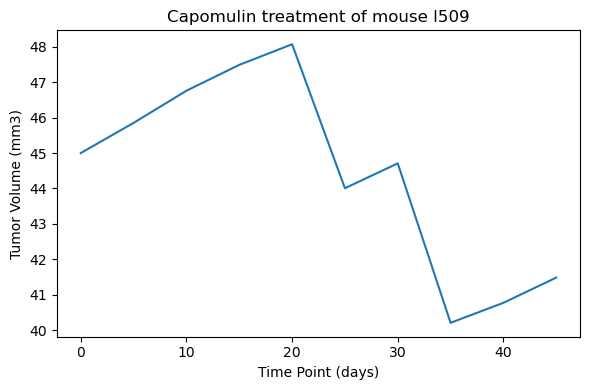

In [73]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = merged_data[merged_data['Drug Regimen'] == 'Capomulin']

selected_mouse_id = 'l509'
selected_mouse_data = capomulin_data[capomulin_data['Mouse ID'] == selected_mouse_id]

plt.figure(figsize=(6, 4))
plt.plot(selected_mouse_data['Timepoint'], selected_mouse_data['Tumor Volume (mm3)'])

# Set the title and labels
plt.title(f'Capomulin treatment of mouse {selected_mouse_id}')
plt.xlabel('Time Point (days)')
plt.ylabel('Tumor Volume (mm3)')

plt.tight_layout()
plt.show()

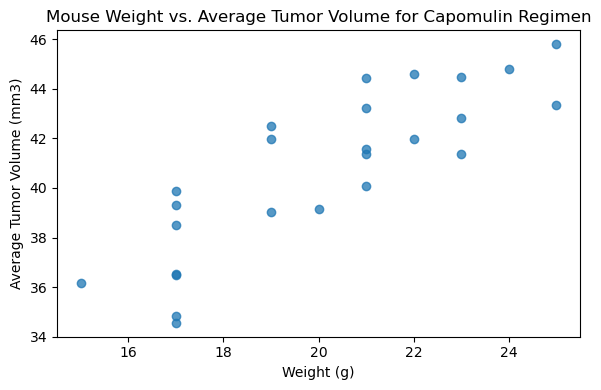

In [77]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean() #average tumor vol by mouseID

#Merge the average tumor volume data with the mouse weight data
merged_data = pd.merge(average_tumor_volume, capomulin_data[['Mouse ID', 'Weight (g)']], on='Mouse ID', how='left')
merged_data = merged_data.drop_duplicates()

#plot weight vs tumor volume
plt.figure(figsize=(6, 4))
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], alpha=0.75)

# Set the title and labels
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.tight_layout()
plt.show()

## Correlation and Regression

Correlation coefficient between the mouse weight and the average tumor volume is: 0.84


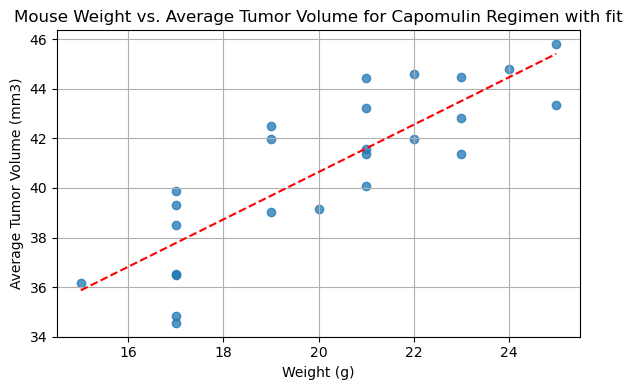

In [84]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
import numpy as np
from scipy.stats import pearsonr, linregress

# Calculate the correlation coefficient
correlation_coefficient, _ = pearsonr(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])
print(f"Correlation coefficient between the mouse weight and the average tumor volume is: {correlation_coefficient:.2f}")

#scatterplot
plt.figure(figsize=(6, 4))
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], alpha=0.75, label='Data')

#add line fit
x_values = np.array([min(merged_data['Weight (g)']), max(merged_data['Weight (g)'])])
y_values = slope * x_values + intercept
plt.plot(x_values, y_values, color='red', linestyle='--', label=f'Regression Line: y = {slope:.2f}x + {intercept:.2f}')

plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen with fit')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.grid(True)
plt.tight_layout()
plt.show()


